<a href="https://colab.research.google.com/github/Artty02/Assignment/blob/main/DADS6003_HomeWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 28.8 MB/s eta 0:00:00


Respondent's Gender                                                                   0
Respondent's Age Range                                                                0
Respondent's Occupation                                                               0
Respondent's Salary Range                                                             0
What operating system do you currently use on your smartphone?                        0
What do you use your smartphone for the most? [Playing games]                         0
What do you use your smartphone for the most? [Using social media]                    0
What do you use your smartphone for the most? [Watching movies/listening to music]    0
What do you use your smartphone for the most? [Taking photos/videos]                  0
If you were to buy a new smartphone, what brand would you choose?                     0
From the previous question, what is the reason for your choice?                       0
dtype: int64
Accuracy: 1.0
Class

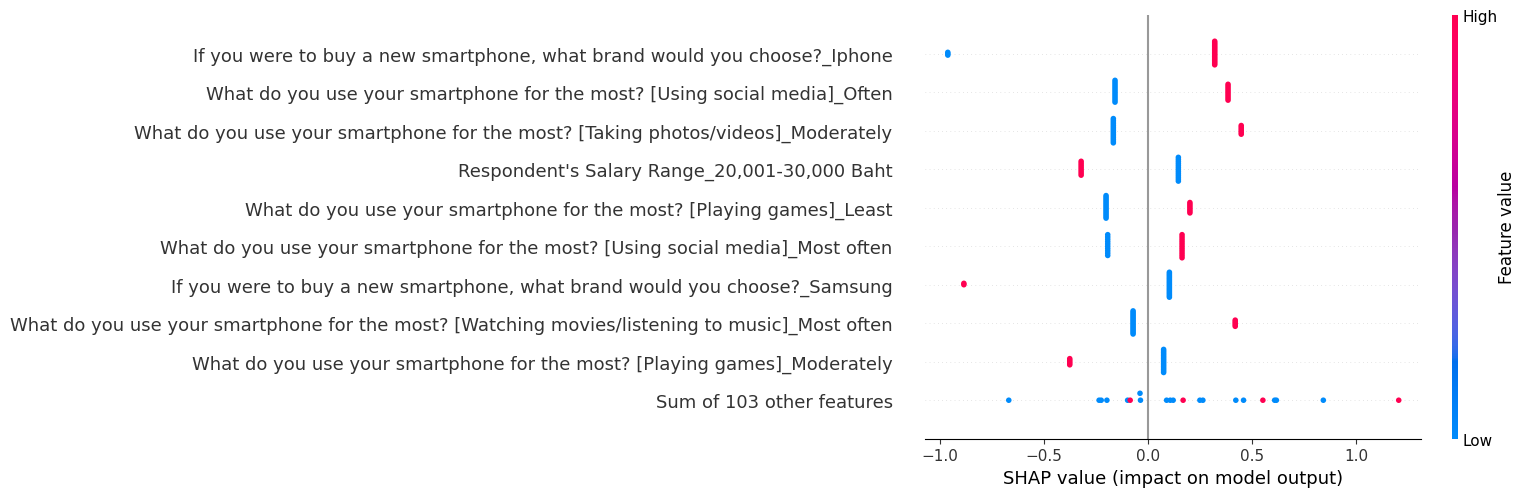

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ Excel
data = pd.read_excel("สำรวจการใช้ Smartphone (Responses).xlsx")

# ตรวจสอบข้อมูลเพื่อดูว่ามีค่าที่หายไปหรือไม่
print(data.isnull().sum())

# แปลงข้อมูลประเภทข้อความเป็นตัวเลข
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[['Respondent\'s Gender', 'Respondent\'s Age Range', 'Respondent\'s Occupation', 'Respondent\'s Salary Range',
                                           'What do you use your smartphone for the most? [Playing games]',
                                           'What do you use your smartphone for the most? [Using social media]',
                                           'What do you use your smartphone for the most? [Watching movies/listening to music]',
                                           'What do you use your smartphone for the most? [Taking photos/videos]',
                                           'If you were to buy a new smartphone, what brand would you choose?',
                                           'From the previous question, what is the reason for your choice?']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
data = pd.concat([data, encoded_df], axis=1)
data = data.drop(['Respondent\'s Gender', 'Respondent\'s Age Range', 'Respondent\'s Occupation', 'Respondent\'s Salary Range',
                 'What do you use your smartphone for the most? [Playing games]',
                 'What do you use your smartphone for the most? [Using social media]',
                 'What do you use your smartphone for the most? [Watching movies/listening to music]',
                 'What do you use your smartphone for the most? [Taking photos/videos]',
                 'If you were to buy a new smartphone, what brand would you choose?',
                 'From the previous question, what is the reason for your choice?'], axis=1)

# แยกข้อมูลเป็นข้อมูลที่ใช้ในการฝึกแบบจำลอง (X) และข้อมูลที่ต้องการทำนาย (y)
X = data.drop("What operating system do you currently use on your smartphone?", axis=1)
y = data["What operating system do you currently use on your smartphone?"]

# แบ่งข้อมูลเป็น 2 ส่วน: ฝึกแบบจำลอง (70%) และทดสอบแบบจำลอง (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างแบบจำลอง Logistic Regression
model = LogisticRegression(max_iter=1000)  # เพิ่ม max_iter เพื่อให้แน่ใจว่าโมเดลจะฝึกจนเสร็จ
model.fit(X_train, y_train)

# ทดสอบแบบจำลอง
y_pred = model.predict(X_test)

# ประเมินความแม่นยำของแบบจำลอง
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ใช้ SHAP เพื่ออธิบายโมเดล
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# สร้างกราฟ Beeswarm
shap.plots.beeswarm(shap_values)

# แสดงกราฟ
plt.show()
